This code is to replicate the results produced by Bhattacharjee et al. (2014; henceforth B-14). Data taken from Pont et al. (1994; Henceforth P-94)

**Conclusions**: The data taken from P-94, and processed in the manner prescribed as per B-14 matches well. 
The data points used in B-14 could not be explicitly found; hence, an online tool was used to extract the data from the plots (Figure 2 in B-14) given.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

The file contains the data used in Pont et al. (1994), which is of 278 Cepheids. Columns are <br>
<pre>
    1-2 : Galactic Coordinates (l,b) in degrees
    3 : Period of the Cepheids (P) in days
    4 : Visual Magnitude (&lt;V&gt;)
    5 : Colour (&lt;B-V&gt;)
    6 : Colour Excess (E(B-v))
    7-8 : Distance Modulus calculated using 3,4,5 and 6 by two methods : 
                Feast & Walker (1987; FW) and Caldwell & Coulson (1987; CC).
    9 : Radial Velocity (v<sub>r</sub>) in km s<sup>-1</sup>
</pre>

In [6]:
file_name = "Cepheid_P94.txt"
data_pont = np.genfromtxt(file_name,usecols=(1,2,3,4,5,6,7,8,9))
l,b,P,V,BV,e_BV,mu_FW,mu_CC,v = data_pont.transpose()
print("File contains data for {} Classical Cepheids".format(l.size))

ValueError: Some errors were detected !
    Line #1 (got 3 columns instead of 9)
    Line #2 (got 3 columns instead of 9)
    Line #3 (got 3 columns instead of 9)
    Line #4 (got 3 columns instead of 9)
    Line #5 (got 3 columns instead of 9)
    Line #6 (got 3 columns instead of 9)
    Line #7 (got 3 columns instead of 9)
    Line #8 (got 3 columns instead of 9)
    Line #9 (got 3 columns instead of 9)
    Line #10 (got 3 columns instead of 9)

In [ ]:
print("(l,b) ranges of data")
print("{}<l<{}".format(l.min(),l.max()))
print("{}<b<{}".format(b.min(),b.max()))

(l,b) ranges of data
1.2<l<359.0
-32.8<b<26.5


Using the (l,b) ranges used by Bhattacharjee et al. (2014)<br>

$$\small 10<l<170 \text{ and } 190<l<350, \text{ and } |b|<10$$

In [ ]:
data = data_pont[(((10<l)&(l<170))|((190<l)&(l<350)))&(b<10)&(b>-10)]
l,b,P,V,BV,e_BV,mu_FW,mu_CC,v = data.transpose()

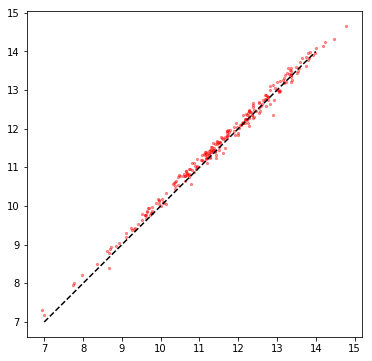

In [ ]:
plt.figure(figsize=(6,6))
# plt.rc('text', usetex=True)
plt.scatter(mu_CC[mu_CC>2],mu_FW[mu_FW>2],s=5,color='r',marker='o',alpha=0.4)
plt.plot(range(7,15),range(7,15),'k--')
# plt.xlabel(r'$\mu_{CC}$',fontsize=20);
# plt.ylabel(r'$\mu_{FW}$',fontsize=20);

In [ ]:
np.sqrt(((mu_CC-mu_FW)**2).sum()/mu_CC.size) # RMS variation in mu from CC and FW

0.15792203797678195

In [ ]:
def mu2dist(mu):
    return 10**(1+mu/5)/1000

def cos(x):
    return np.cos(x*np.pi/180)

def sin(x):
    return np.sin(x*np.pi/180)

We find the heliocentric distance, r_h from the distance modulus as 
    $$\small r \text{ (in pc)} = 10^{\displaystyle\small 1+\frac{\mu}{5}}$$

In [ ]:
r_h = mu2dist(mu_FW) # This is the method used by B-14 to find the distance, found by trial and error

We reconstruct the circular velocity from the LOS velocity and Heliocentric distance as per Bhattacharjee et al.(2014)<br>
$$[U_{\odot},V_{\odot},W_{\odot}] = [11.1,12.24,7.25] \text{ km s}^{-1} $$

In [ ]:
def give_data(R0,V0):
    v_lsr = v + 11.1*cos(b)*cos(l) + 12.24*cos(b)*sin(l) + 7.25*sin(b) # Peculiar motion of Sun (1)
    R = np.sqrt(R0**2 + r_h**2*(cos(b))**2 - 2*R0*r_h*cos(b)*cos(l)) # Galactocentric Radial distance (3)
    v_c = R/R0*(v_lsr/(cos(b)*sin(l))+V0) # Galactocentric Circular Velocity (2)
    return R,v_c

In [ ]:
R1,V1 = give_data(8.0,200) # Sofue (2012)
R2,V2 = give_data(8.3,244) # Bovy et al.(2009), Gillessen et al.(2009)
R3,V3 = give_data(8.5,220) # IAU recommnded

In [ ]:
def binning(R,V):
    bin_edge = np.arange(int(R.min()),int(R.max())+2,1)
    Rc,Vc,V_error = [],[],[]
    for i in range(len(bin_edge)-1):
        R_bin = R[(R<=bin_edge[i+1])&(R>=bin_edge[i])]
        V_bin = V[(R<=bin_edge[i+1])&(R>=bin_edge[i])]
        Rc.append(R_bin.mean())
        Vc.append(V_bin.mean())
        V_error.append(V_bin.std())
        print(R_bin.size, end=' ') 
    return Rc,Vc,V_error

In [7]:
bhattacharjee_data = np.loadtxt('./../Data/Bhattacharjee_Cepheid_P94.txt')
print(bhattacharjee_data)

FileNotFoundError: ./../Data/Bhattacharjee_Cepheid_P94.txt not found.

3 25 79 65 30 33 11 5 2 1 

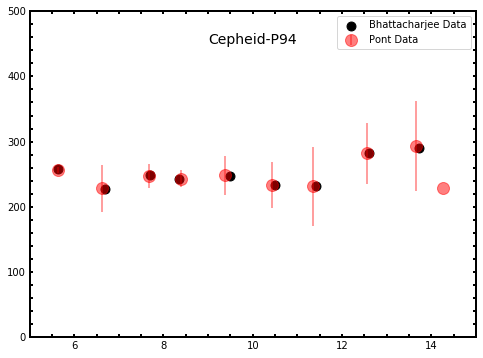

In [ ]:
Rc,Vc,V_err = binning(R2,V2)

plt.figure(figsize=(8,6))
plt.minorticks_on()
plt.tick_params(direction='in',which='both')
plt.errorbar(Rc,Vc,V_err,marker='o', markersize=12,ls='',color='r',alpha=0.5,label="Pont Data")
plt.scatter(bhattacharjee_data[:,0],bhattacharjee_data[:,1],color='k',marker='o',s=80,label="Bhattacharjee Data")
plt.ylim(0,500)
plt.xlim(5,15)

ax = plt.gca()
ax.text(10,450,"Cepheid-P94",horizontalalignment='center',fontsize=14)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(which='both',axis='both',direction='in',width=2,size=3,right=True,top=True)


plt.legend()
plt.savefig('./../images/Bhattacharjee/B14_vs_P94.jpg')

In [ ]:
R0 = 8.3
x = r_h*cos(b)*sin(l)
y = R0 - r_h*cos(b)*cos(l)
z = r_h*sin(b)

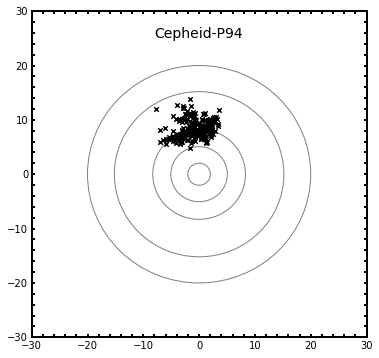

In [ ]:
plt.figure(figsize=(6,6))
plt.minorticks_on()
circle1 = plt.Circle((0, 0), R0, color='k',fill=False,alpha=0.5)
circle2 = plt.Circle((0, 0), 2.025, color='k',fill=False,alpha=0.5)
circle3 = plt.Circle((0, 0), 5.063, color='k',fill=False,alpha=0.5)
circle4 = plt.Circle((0, 0), 15.19, color='k',fill=False,alpha=0.5)
circle5 = plt.Circle((0, 0), 20, color='k',fill=False,alpha=0.5)
ax = plt.gca()
ax.scatter(x,y,marker='x',s=20,color='k')
ax.text(0,25,"Cepheid-P94",horizontalalignment='center',fontsize=14)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(which='both',axis='both',direction='in',width=2,size=3,right=True,top=True)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.set_ylim(-30,30)
ax.set_xlim(-30,30)
plt.savefig("./../images/Bhattacharjee/xy_scatter_Cepheid-P94.jpg")

In [ ]:
np.savetxt('Cepheid_P94.txt', np.c_[Rc,Vc,V_err],'%f')